In [1]:
import pandas as pd
import numpy as np

In [2]:
habit_data = pd.read_csv('data/kt_export_2022_12_4_12_20.csv', skiprows = 15, nrows=378, names=['empty', 'time', 'bool', 'answer'])

In [3]:
habit_data.drop(['empty', 'answer'], axis=1, inplace=True)

In [5]:
habit_data['time'] = pd.to_datetime(habit_data.time).dt.tz_convert(tz='Europe/Moscow')

<AxesSubplot: xlabel='time'>

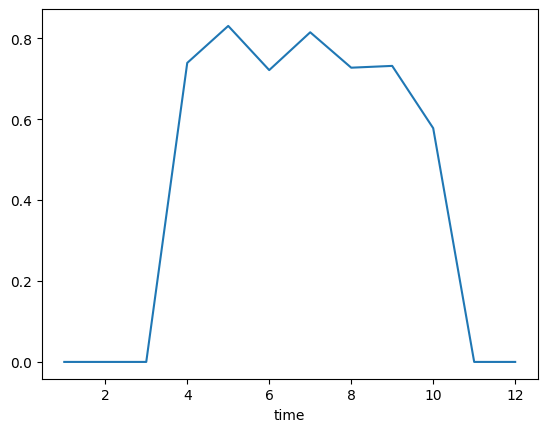

In [7]:
habit_data.groupby(habit_data.time.dt.month).bool.mean().plot()

In [74]:
habit_data.head()

,time,bool
0,2021-04-05 11:59:00+03:00,1
1,2021-04-06 19:24:00+03:00,1
2,2021-04-07 09:09:00+03:00,0
3,2021-04-08 10:41:00+03:00,0
4,2021-04-09 09:16:00+03:00,1


# get weather data

In [9]:
import os
import urllib.request

url = "https://ru1.rp5.ru/download/files.synop/27/27514.01.01.2020.04.12.2022.1.0.0.ru.utf8.00000000.csv.gz"
filename = "weather.csv.gz"
urllib.request.urlretrieve(url, filename)

('weather.csv.gz', <http.client.HTTPMessage at 0x2316ac7bc40>)

In [10]:
data = pd.read_csv(filename, skiprows=6, encoding='utf-8', compression='gzip', sep=';', index_col=False)
data['date'] = pd.to_datetime(data['Местное время в Шереметьево / им. А. С. Пушкина (аэропорт)'],
                              dayfirst=True)
data = data[data['T'].notna()]


In [11]:
import matplotlib.pyplot as plt

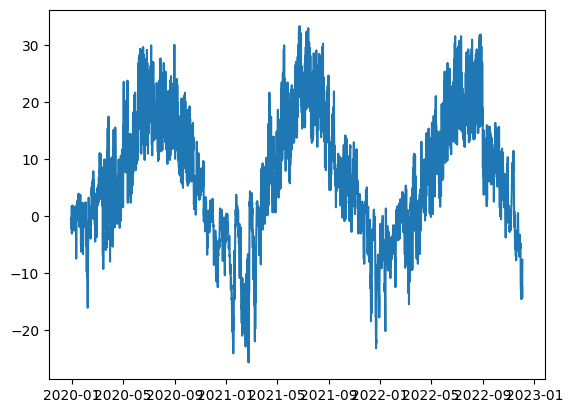

In [12]:
# Распечатаем график температуры
x = data['date']
y = data['T']

plt.plot(x, y)

In [13]:
data.RRR.value_counts()

Осадков нет      965
Следы осадков    364
2.0              111
0.3               80
1.0               80
0.4               70
3.0               67
0.2               62
0.5               48
4.0               40
0.6               36
0.7               35
5.0               28
0.8               26
7.0               22
0.9               14
6.0               12
0.1                9
8.0                7
9.0                6
13.0               6
10.0               5
20.0               3
23.0               3
21.0               2
26.0               2
12.0               2
16.0               2
24.0               1
30.0               1
28.0               1
11.0               1
18.0               1
47.0               1
17.0               1
Name: RRR, dtype: int64

In [14]:
data['Местное время в Шереметьево / им. А. С. Пушкина (аэропорт)'] = pd.to_datetime(data['Местное время в Шереметьево / им. А. С. Пушкина (аэропорт)']).dt.tz_localize(tz='Europe/Moscow')

In [15]:
data.VV.value_counts()

10.0         6403
7.0           202
6.0           188
8.0           156
9.0           147
3.0            36
4.4            36
3.9            36
3.8            36
2.8            35
3.4            35
2.5            35
3.5            32
2.9            32
4.5            31
4.8            31
2.7            31
3.2            28
3.7            28
4.2            28
2.6            28
4.1            27
3.1            27
2.1            26
1.6            26
2.2            25
4.3            25
3.6            25
1.7            25
3.3            25
2.4            23
4.0            23
4.6            22
2.3            20
1.1            20
1.0            20
1.9            19
1.3            19
1.5            18
1.2            18
4.9            18
0.1            17
0.2            17
0.8            16
4.7            16
0.7            15
2.0            15
0.9            15
1.8            15
5.0            14
1.4            14
0.4            11
0.6            11
0.3             8
0.5             6
менее 0.1 

In [16]:
data.N.value_counts()

100%.                                                                 2664
90  или более, но не 100%                                             1473
70 – 80%.                                                             1066
60%.                                                                   862
20–30%.                                                                642
40%.                                                                   631
50%.                                                                   601
Облаков нет.                                                           395
10%  или менее, но не 0                                                 77
Небо не видно из-за тумана и/или других метеорологических явлений.      60
Name: N, dtype: int64

In [17]:
data[['T', 'P', 'U', 'Ff', 'N', 'VV', 'RRR']]

,T,P,U,Ff,N,VV,RRR
0,-7.7,785.8,81,7,100%.,10.0,0.5
1,-9.1,785.4,85,5,100%.,3.6,NaN
2,-14.4,786.1,85,6,100%.,4.9,Следы осадков
3,-13.5,785.2,85,5,100%.,9.0,NaN
4,-12.9,784.7,85,5,40%.,10.0,NaN
...,...,...,...,...,...,...,...
8470,-2.3,757.2,75,5,"90 или более, но не 100%",10.0,NaN
8471,-0.9,763.3,94,5,100%.,3.3,0.2
8472,-1.2,763.5,93,5,100%.,2.6,NaN
8473,-1.3,763.8,92,5,100%.,2.8,NaN


In [18]:
data['N'].value_counts().index

Index(['100%.', '90  или более, но не 100%', '70 – 80%.', '60%.', '20–30%.',
       '40%.', '50%.', 'Облаков нет.', '10%  или менее, но не 0',
       'Небо не видно из-за тумана и/или других метеорологических явлений.'],
      dtype='object')

In [19]:
def n_replacer(df):
    n_dict = {'100%.':1, '90  или более, но не 100%':0.95, '70 – 80%.': 0.75, '60%.':0.6, '20–30%.':0.25,
       '40%.':0.4, '50%.':0.5, 'Облаков нет.':0, '10%  или менее, но не 0':0.05,
       'Небо не видно из-за тумана и/или других метеорологических явлений.':1}
    return df.replace({'N':n_dict})

data = n_replacer(data)

In [20]:
def vv_replace(df):
    vv_dict = {'менее 0.1':0}
    df['VV'] = df.replace({'VV':vv_dict}).VV.astype('float')
    return df

data = vv_replace(data)

In [21]:
data.RRR.value_counts().index

def rr_replace(df):
    rrr_dict = {'Осадков нет':0, 'Следы осадков':0.05}
    df = df.replace({'RRR':rrr_dict})
    df['RRR'] = df['RRR'].astype('float')
    return df

data = rr_replace(data)



In [22]:
data['time'] = data['Местное время в Шереметьево / им. А. С. Пушкина (аэропорт)']

In [23]:
covariates = data.groupby(data['time'].dt.floor('d'))[['T', 'P', 'U', 'Ff', 'N', 'VV', 'RRR']].agg(['min', 'mean', 'max'])

In [24]:
agg_y = habit_data.groupby(habit_data['time'].dt.floor('d'))[['bool']].max()

In [25]:
agg_y = agg_y.rename(columns={'bool':'y'})

In [73]:
covariates.head()

T                    P                    U  \
                           min    mean   max    min      mean    max min   
time                                                                       
2020-01-01 00:00:00+03:00 -3.1 -1.1875   1.6  746.2  759.5750  763.8  75   
2020-01-02 00:00:00+03:00 -1.1 -0.3625   1.6  752.3  753.2250  753.8  88   
2020-01-03 00:00:00+03:00 -3.7  0.7000   4.7  755.5  757.4125  759.0  49   
2020-01-04 00:00:00+03:00 -8.0 -2.1625   2.4  752.2  755.7625  760.1  39   
2020-01-05 00:00:00+03:00  3.0  7.4250  11.6  760.9  761.6250  762.2  29   

                                       Ff  ...         N                   VV  \
                             mean max min  ... max   min     mean   max   min   
time                                       ...                                  
2020-01-01 00:00:00+03:00  87.750  95   5  ...   5  0.75  0.95625  1.00   2.4   
2020-01-02 00:00:00+03:00  94.125  98   2  ...   4  1.00  1.00000  1.00   2.7   
2020-01-03 00:00:00+03:00  73.625  94   2  ...   8  0.00  0.66875  1.00  10.0   
2020-01-04 00:00:00+03:00  59.000  96   3  ...   9  0.05  0.65625  1.00   6.0   
2020-01-05 00:00:00+03:00  47.750  67   3  ...   6  0.00  0.36250  0.75  10.0   

                                           RRR               
                              mean   max   min   mean   max  
time                                                         
2020-01-01 00:00:00+03:00   6.3875  10.0  0.05  0.125  0.20  
2020-01-02 00:00:00+03:00   4.2375   8.0  0.00  0.200  0.40  
2020-01-03 00:00:00+03:00  10.0000  10.0  0.00  0.025  0.05  
2020-01-04 00:00:00+03:00   9.1250  10.0  0.00  0.150  0.30  
2020-01-05 00:00:00+03:00  10.0000  10.0  0.00  0.000  0.00  

[5 rows x 21 columns]

In [72]:
agg_y.head()

,y
time,
2021-04-05 00:00:00+03:00,1
2021-04-06 00:00:00+03:00,1
2021-04-07 00:00:00+03:00,0
2021-04-08 00:00:00+03:00,0
2021-04-09 00:00:00+03:00,1


In [28]:
result_info = pd.merge(agg_y,covariates, left_index=True, right_index=True)

C:\Users\ksetd\AppData\Local\Temp\ipykernel_9236\223266267.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  result_info = pd.merge(agg_y,covariates, left_index=True, right_index=True)


In [36]:
result_info.columns = ["_".join(y) for y in result_info.columns]

In [ ]:
from pandas_profiling import ProfileReport
report = ProfileReport(result_info)
report


In [39]:
result_info.columns

Index(['y', 'T_min', 'T_mean', 'T_max', 'P_min', 'P_mean', 'P_max', 'U_min',
       'U_mean', 'U_max', 'Ff_min', 'Ff_mean', 'Ff_max', 'N_min', 'N_mean',
       'N_max', 'VV_min', 'VV_mean', 'VV_max', 'RRR_min', 'RRR_mean',
       'RRR_max'],
      dtype='object')

In [40]:
prepared_data = result_info.reset_index()[['time', 'T_min', 'T_mean', 'T_max', 'P_min', 'P_mean', 'P_max', 'U_min',
       'U_mean', 'U_max', 'Ff_min', 'Ff_mean', 'Ff_max', 'N_min', 'N_mean',
       'N_max', 'VV_min', 'VV_mean', 'VV_max', 'RRR_min', 'RRR_mean',
       'RRR_max', 'y']]

In [71]:
prepared_data.head()

,time,T_min,T_mean,T_max,P_min,P_mean,P_max,U_min,U_mean,U_max,...,N_min,N_mean,N_max,VV_min,VV_mean,VV_max,RRR_min,RRR_mean,RRR_max,y
0,2021-04-05 00:00:00+03:00,4.1,5.5000,8.2,747.4,749.212500,751.9,58,72.125000,87,...,0.60,0.893750,1.00,8.0,9.7500,10.0,0.05,1.025,2.0,1
1,2021-04-06 00:00:00+03:00,12.4,17.3750,22.1,766.3,767.962500,769.4,29,45.250000,65,...,0.00,0.287500,0.60,10.0,10.0000,10.0,0.00,0.000,0.0,1
2,2021-04-07 00:00:00+03:00,16.4,18.8000,22.6,759.3,759.885714,760.6,61,72.428571,80,...,0.25,0.657143,0.95,10.0,10.0000,10.0,0.00,0.000,0.0,0
3,2021-04-08 00:00:00+03:00,14.2,17.6375,22.8,758.9,760.975000,762.5,42,68.000000,82,...,0.25,0.506250,0.95,10.0,10.0000,10.0,0.00,0.150,0.3,0
4,2021-04-09 00:00:00+03:00,6.1,7.7875,9.6,750.1,753.612500,757.3,68,80.625000,85,...,0.50,0.800000,0.95,4.1,9.2625,10.0,2.00,3.500,5.0,1


In [44]:
prepared_data.shape[0]*0.7

256.2

* train.csv - the training set
* test.csv - the test set
* sample_submission.csv

In [ ]:
def create_train_test(df, split=0.7):
    splitter = int(df.shape[0] * split)
    df = df.reset_index()
    df = df.rename(columns={'index':'Id'})
    train, test =  df[:splitter], df[splitter:]
    solution = test[['Id', 'y']]

    test = test.drop(columns='y')
    print(solution.head())
    sample_submission = solution.copy()
    sample_submission['y'] = np.random.randint(2,size = sample_submission.shape[0])
    print(sample_submission.head())
    
    return train, test, solution, sample_submission

train, test, solution, sample_submission = create_train_test(prepared_data)

In [70]:
train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)
solution.to_csv('data/solution.csv', index=False)
sample_submission.to_csv('data/sample_submission.csv', index=False)
